In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt

api_key = pd.read_json('fmp_api_key.json').iloc[0].to_list()[0]

In [3]:
### Financial Statements
revenuesExpenses = ['revenue',
 'costOfRevenue',
 'grossProfit',
 'researchAndDevelopmentExpenses',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'otherExpenses',                   
 'operatingExpenses',
 'costAndExpenses',
 'interestExpense',
 'depreciationAndAmortization',
 'operatingIncome',
 'totalOtherIncomeExpensesNet',
 'incomeBeforeTax', 
 'incomeTaxExpense',
 'netIncome']

ignoreList = ['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'link', 'finalLink']
headers = {'Content-Type': 'application/json'}

def drop_ignoreList(df, ignoreList):
    """ 
    Input: dataframe and a list of columns to be dropped.
    Output: dataframe with indices 'symbol' and 'date'
    """
    df.drop(ignoreList, axis=1, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_income_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of income_statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income statement with revenues and expenses given in millions.  
    """  
    if period == 'FY':
        limit = 120
    else:
        limit = 400
        
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, ignoreList)
    
    # Convert revenueExpenses into millions.
    df[revenuesExpenses] = df[revenuesExpenses].apply(lambda x:x*1.0e-6)
    
    return df

def get_balance_sheet_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, ignoreList)
    
    # Convert values into millions.
    df = df.apply(lambda x:x*1.0e-6)
    
    return df

def get_cash_flow_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of cash-flow-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, ignoreList)
    
    # Convert values into millions.
    df = df.apply(lambda x:x*1.0e-6)
    
    return df

### Financial Statements Growth
def get_income_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of income-statement-growth ('FY' only). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income-statement-growth. 
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

def get_balance_sheet_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

def get_cash_flow_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of cash-flow-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

### Company Financial Ratios
def get_financial_ratios_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM ratios
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios-ttm/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

def get_financial_ratios(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company ratios
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 140
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df


### Company Key Metrics
def get_key_metrics_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM key metrics
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics-ttm/" +
                       ticker + "?limit=40" + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())        
        return df
    
    else:
        pass
    
def get_key_metrics(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company key metrics
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 130
        
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        df = drop_ignoreList(df, [])
        
        return df
    
    else:
        pass

### Company Financial Growth
def get_financial_growth(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company financial growth
    """   
    if period == 'FY':
        limit = 20
    else:
        limit = 80
    response = requests.get("https://financialmodelingprep.com/api/v3/financial-growth/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

### Company Discounted cash flow value
def get_discounted_cash_flow(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

def get_hist_discounted_cash_flow(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json()[0]['historicalDCF'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
        
    return df

def get_hist_discounted_cash_flow_daily(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company daily historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

# Earnings Calendar
def get_earnings_calendar():
    """ 
    Inputs: none
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/earning_calendar/" +
                       "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

# Company Profile
def get_profile(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company profile
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/profile/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        
        return df.transpose()
    
    else:
        pass

# Institutional holders
def get_institutional_holder(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: dataframe for institutional holders
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/institutional-holder/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())    
    
    return df

# Earnings Surprises
def get_earnings_surprises(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company earning-surprises
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/earnings-surprises/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    df['earningSurprise'] =  ((df['actualEarningResult'] - df['estimatedEarning']) / abs(df['estimatedEarning'])) * 100
    
    return df

# Key Executives
def get_key_executives(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company key executives
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/key-executives/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

### Stock Screener
- marketCapMoreThan & marketCapLowerThan : Number
- priceMoreThan & priceLowerThan : Number
- betaMoreThan & betaLowerThan : Number
- volumeMoreThan & volumeLowerThan : Number
- dividendMoreThan & dividendLowerThan : Number
- isEtf & isActivelyTrading : true/false
- sector : Consumer Cyclical - Energy - Technology - Industrials - Financial Services - Basic Materials - Communication Services - Consumer Defensive - Healthcare - Real Estate - Utilities - Industrial Goods - Financial - Services - Conglomerates
- Industry : Autos - Banks - Banks Diversified - Software - Banks Regional - Beverages Alcoholic - Beverages Brewers - Beverages - Non-Alcoholic
- Country : US - UK - MX - BR - RU - HK - CA - ...
- exchange : nyse - nasdaq - amex - euronex - tsx - etf - mutual_fund
- limit : Number

Large Cap >= 10B

2B =< Mid Cap < 10B

0.3B < Small Cap < 2B

In [4]:
profile = get_profile('DAC').iloc[[0,4,9,14,15,19,20,17]]
profile

,0
symbol,DAC
mktCap,1126649600
currency,USD
exchangeShortName,NYSE
industry,Marine Shipping
sector,Industrials
country,GR
description,Danaos Corp. engages in the provision of marin...


In [5]:
profile.loc['mktCap']/1.0e9

0    1.12665
Name: mktCap, dtype: object

In [8]:
large_cap = 10000000000
mid_cap = 2000000000
small_cap = 300000000

params = {'sector': 'Industrials',
          'industry': 'Marine Shipping',
          #'country': 'US',
          #'exchange': 'NASDAQ',
          'isEtf': False,
          'marketCapLowerThan': mid_cap,
          'marketCapMoreThan': small_cap,
          'volumeMoreThan': 100000,
          'limit': 300}

def get_stock_screener(params):
    response = requests.get("https://financialmodelingprep.com/api/v3/stock-screener?" 
                            + 'marketCapLowerThan=' + str(params['marketCapLowerThan'])
                            + '&marketCapMoreThan=' + str(params['marketCapMoreThan'])
                            + '&volumeMoreThan=' + str(params['volumeMoreThan'])
                            + '&sector=' + str(params['sector'])
                            + '&industry=' + str(params['industry'])
                            #+ '&country=' + str(params['country'])
                            #+ '&exchange=' + str(params['exchange'])
                            + '&isEtf=' + str(params['isEtf'])
                            + '&limit=' + str(params['limit'])
                            + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df.set_index(['symbol'], inplace=True)
    
    return df

### Initial screening by sector and market cap

In [9]:
screened_tickers = get_stock_screener(params)
tickers = screened_tickers.index.to_list()
print(tickers[:])
print('\n')
print("number of screened tickers =", len(tickers))

['SBLK', 'WTE.TO', 'CMRE', 'DAC', 'KNOP', 'INSW', 'NAT', 'EGLE', 'GNK', 'CTRM', 'NMM']


number of screened tickers = 11


### Industries

In [10]:
# find industries of the screened stock tickers
def get_industries_from_profiles(tickers):
    
    temp = []

    for ticker in tickers:
        df_industry = get_profile(ticker).loc[['symbol', 'industry']]
        temp.append(df_industry)
    
    df = pd.concat(temp, axis=1)
    df = df.transpose()
    df.columns = ['symbol', 'industry']
    df.reset_index(drop=True, inplace=True)
    
    return df

In [ ]:
df_industry = get_industries_from_profiles(tickers)
df_industry['industry'].value_counts()

In [ ]:
df_industry['industry'].value_counts().plot.bar();

### Key Metrics

In [14]:
def get_key_metrics_tickers(tickers, period):
    """
    Input: a list of stock tickers and period ('FY', or 'quarter')
    Output: pandas dataframe for selected key metrics
    """ 
    metrics = [
        'peRatio',
        'enterpriseValueOverEBITDA',
        'evToSales',
        'freeCashFlowYield',
        'debtToEquity',
        'roic',
        'roe',
        'salesGeneralAndAdministrativeToRevenue',
        'researchAndDdevelopementToRevenue'
    ]
    
    dataframes = []
    
    for ticker in (tickers):
        df = get_key_metrics(ticker, period)
        dataframes.append(df)
    df = pd.concat(dataframes)
    df['peRatio'] = pd.to_numeric(df['peRatio'])
    df['enterpriseValueOverEBITDA'] = pd.to_numeric(df['enterpriseValueOverEBITDA'])
    df['evToSales'] = pd.to_numeric(df['evToSales'])
    df['freeCashFlowYield'] = pd.to_numeric(df['freeCashFlowYield'])
    df['debtToEquity'] = pd.to_numeric(df['debtToEquity'])
    df['roic'] = pd.to_numeric(df['roic'])
    df['roe'] = pd.to_numeric(df['roe'])
    df['salesGeneralAndAdministrativeToRevenue'] = pd.to_numeric(df['salesGeneralAndAdministrativeToRevenue'])
    df['researchAndDdevelopementToRevenue'] = pd.to_numeric(df['researchAndDdevelopementToRevenue'])
    df_metrics = df[metrics]
    df_metrics = df_metrics.rename(columns={'enterpriseValueOverEBITDA': 'EV/EBITDA', 
                       'salesGeneralAndAdministrativeToRevenue': 'SG&A/revenue', 
                       'researchAndDdevelopementToRevenue': 'R&D/revenue' })
    
    return df_metrics


def make_comparison_plot(df_0, ticker_a, ticker_b, metrics):
    
    df_a = df_0.loc[ticker_a][metrics][:20].sort_index()
    df_b = df_0.loc[ticker_b][metrics][:20].sort_index()
    df = pd.concat([df_a, df_b], axis=1)
    df.columns = [metrics + '_' + ticker_a, metrics + '_' + ticker_b]
    ax = df.plot.bar(figsize=(10,7), grid=True)
    ax.set_xlabel('')
    ax.set_ylabel(metrics, fontsize=14)
    plt.tight_layout()
    
    return ax   

### Tickers selection
get quarterly key metrics for given sector and market cap

In [15]:
df_metrics_quarter = get_key_metrics_tickers(tickers, 'quarter')
#df_metrics_quarter.head(2)

In [17]:
tickers_selected = df_metrics_quarter.index.get_level_values(0).unique().to_list()
print("number of selected tickers =", len(tickers_selected))

number of selected tickers = 11


In [ ]:
df_last4q = df_metrics_quarter.groupby('symbol').head(4)
pe_25 = df_last4q['peRatio'].groupby('symbol').min().describe()['25%']
pe_75 = df_last4q['peRatio'].groupby('symbol').max().describe()['75%']
print("pe_25=", pe_25)
print("pe_75=", pe_75)

In [ ]:
df_last4q[['peRatio']].describe().transpose()

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
df_last4q['peRatio'].hist(bins=100)
#ax.set_xlim(-3000, 10000)

In [ ]:
df_last4q[df_last4q['peRatio'] > pe_75].index.get_level_values(0).nunique()

In [ ]:
tickers_ignored = set(df_last4q[(df_last4q['peRatio'] <= pe_25) | (df_last4q['peRatio'] >= pe_75)].index.get_level_values(0).unique())
all_tickers = set(df_metrics_quarter.index.get_level_values(0).unique())
tickers_selected = list(all_tickers - tickers_ignored)
print(tickers_selected)
print('\n')
print("number of selected tickers =", len(tickers_selected))

In [ ]:
'RMD' in tickers_selected

In [18]:
# Selected tickers' statistic
quarterly_stat = df_metrics_quarter.loc[tickers_selected].describe().transpose()
quarterly_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,481.0,27.660672,427.944048,-2518.677009,-1.097547,7.720243,13.823058,7784.778444
EV/EBITDA,484.0,161.028495,2648.775611,-18805.252500,23.002133,33.579504,48.592963,50794.405573
evToSales,469.0,57.204494,787.890733,-0.030244,13.105160,19.196412,26.229637,17082.179967
freeCashFlowYield,482.0,-0.040439,0.288965,-3.594233,-0.041105,0.015757,0.046467,0.387241
debtToEquity,440.0,0.872567,2.722248,-26.786967,0.067706,0.527194,1.286939,9.429856
roic,484.0,0.017164,0.040832,-0.076146,-0.000383,0.015115,0.024156,0.729293
roe,440.0,0.004071,0.159903,-2.614622,-0.010213,0.017436,0.039654,1.290644
SG&A/revenue,469.0,0.086230,0.095003,-0.829406,0.041171,0.060459,0.111216,0.765835
R&D/revenue,469.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Get key metrics for selected tickers
FY

In [19]:
df_metrics = get_key_metrics_tickers(tickers_selected, 'FY')
df_metrics.head()

peRatio   EV/EBITDA  evToSales  freeCashFlowYield  \
symbol date                                                              
SBLK   2019-12-31 -48.022039    9.073960   2.215758          -0.332408   
       2018-12-31  10.015835    4.833924   1.865074          -0.272912   
       2017-12-31 -70.962883   10.211869   3.712806          -0.090447   
       2016-12-31  -2.625066   58.049534   4.572486          -1.061116   
       2015-12-31  -0.179323  669.943573   3.354207          -5.945524   

                   debtToEquity      roic       roe  SG&A/revenue  R&D/revenue  
symbol date                                                                     
SBLK   2019-12-31      0.653746  0.026745 -0.010493      0.042392          0.0  
       2018-12-31      0.483031  0.053711  0.038418      0.052139          0.0  
       2017-12-31      0.572709  0.019764 -0.008980      0.093245          0.0  
       2016-12-31      0.764031 -0.032615 -0.148692      0.110767          0.0  
       2015-12-31      0.691057 -0.040490 -0.403553      0.100821          0.0

In [20]:
df_metrics.dropna().index.get_level_values(0).nunique()

11

In [21]:
FY_stat = df_metrics.dropna().describe().transpose()
FY_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,116.0,606.019114,6594.118549,-1400.112804,-2.740795,6.286189,14.210051,70986.109143
EV/EBITDA,116.0,92.556730,824.642463,-63.235211,6.969836,9.049789,13.163993,8871.853082
evToSales,116.0,1348.980489,14464.157818,1.566458,3.093895,4.997755,6.738779,155789.740114
freeCashFlowYield,116.0,-0.192796,0.889645,-5.945524,-0.311616,0.020967,0.131562,2.075617
debtToEquity,116.0,0.806766,3.005057,-26.410058,0.073929,0.505922,1.182939,9.429856
roic,116.0,0.068398,0.092339,-0.137081,0.006266,0.053652,0.094843,0.389357
roe,116.0,0.023498,0.322361,-2.694062,-0.034720,0.056759,0.151010,0.853603
SG&A/revenue,116.0,0.105734,0.218665,0.010206,0.043794,0.062952,0.106406,2.134875
R&D/revenue,116.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
FY_stat['50%'].to_frame().transpose()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
50%,6.286189,9.049789,4.997755,0.020967,0.505922,0.053652,0.056759,0.062952,0.0


In [24]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['peRatio', 'EV/EBITDA', 'evToSales', 'debtToEquity'])

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
INSW,-28.449165,9.341319,3.345854,0.076946,0.487975,0.033865,-0.015450,0.087349,0.0
NMM,-6.966464,6.895158,4.194623,-0.274495,-11.935498,0.085878,0.614028,0.127603,0.0
GNK,-3.798153,6.784543,2.528442,-0.294505,0.463447,-0.005521,-0.118226,0.092603,0.0
SBLK,-0.687181,8.228709,3.237808,-0.302660,0.552890,0.010058,-0.010324,0.109468,0.0
EGLE,-0.383289,12.681509,4.943413,-0.269026,0.798943,0.011491,-0.033522,0.119843,0.0
DAC,2.754278,8.901600,6.462479,-0.010664,2.579401,0.079896,0.075838,0.041612,0.0
CTRM,3.254122,6.759705,2.469781,-4.212257,1.078018,0.046769,0.082410,0.121179,0.0
NAT,7.059215,9.025618,5.075353,-0.007210,0.268236,0.046559,0.045122,0.044036,0.0
CMRE,9.517109,8.189391,4.623227,0.121501,1.180924,0.072881,0.143401,0.064314,0.0


In [ ]:
df_metrics.dropna().groupby(level=0).mean().sort_values(by=['freeCashFlowYield', 'roic', 'roe'], ascending=False).head()

In [ ]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['debtToEquity'], ascending=False).head(10)

### Check interesting stocks
quarterly key metrics

In [25]:
ticker_of_interest = 'DAC'

In [26]:
profile = get_profile(ticker_of_interest)
profile.iloc[[0, 4, 9, 14, 15, 17, 19, 20,]]

,0
symbol,DAC
mktCap,1130144768
currency,USD
exchangeShortName,NYSE
industry,Marine Shipping
description,Danaos Corp. engages in the provision of marin...
sector,Industrials
country,GR


In [27]:
df_stock_metrics = df_metrics_quarter.loc[ticker_of_interest]
df_stock_metrics.head()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
date,,,,,,,,,
2020-12-31,3.048932,22.979000,15.077844,0.028741,1.146554,0.021246,0.041696,0.053827,0.0
2020-09-30,1.053883,18.132068,11.967299,0.342421,1.223323,0.021275,0.042798,0.050853,0.0
2020-06-30,0.595239,18.023750,11.727379,0.053907,1.305788,0.020622,0.040530,0.051471,0.0
2020-03-31,0.844752,20.097400,12.868498,0.134100,1.378618,0.017789,0.032191,0.054993,0.0
2019-12-31,1.667653,20.043788,13.400114,0.202301,1.441168,0.020046,0.038355,0.064009,0.0


In [29]:
quarterly_stat.loc[['peRatio', 'EV/EBITDA']]

,count,mean,std,min,25%,50%,75%,max
peRatio,481.0,27.660672,427.944048,-2518.677009,-1.097547,7.720243,13.823058,7784.778444
EV/EBITDA,484.0,161.028495,2648.775611,-18805.252500,23.002133,33.579504,48.592963,50794.405573


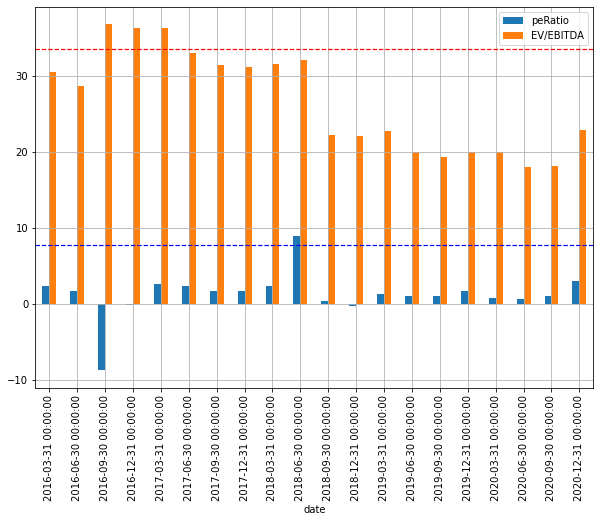

In [31]:
df_stock_metrics[['peRatio', 'EV/EBITDA']][:20].sort_index().plot.bar(grid=True, figsize=(10,7));
plt.axhline(y = quarterly_stat.loc['peRatio']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['EV/EBITDA']['50%'], lw=1.2,ls='--', color='r');

In [32]:
quarterly_stat.loc[['evToSales']]

,count,mean,std,min,25%,50%,75%,max
evToSales,469.0,57.204494,787.890733,-0.030244,13.10516,19.196412,26.229637,17082.179967


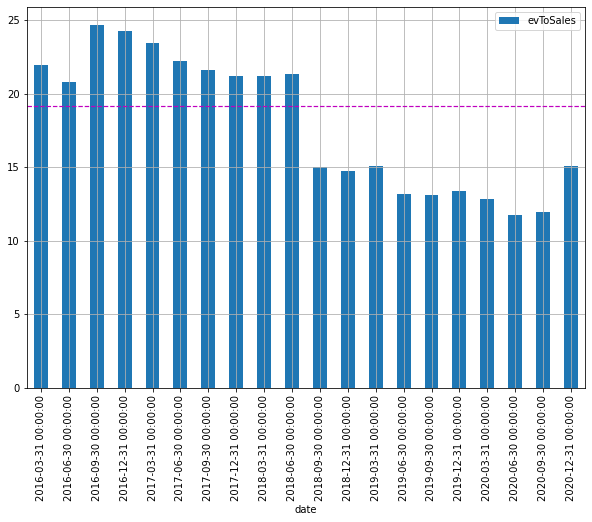

In [33]:
df_stock_metrics['evToSales'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['evToSales']['50%'], lw=1.2,ls='--', color='m');

In [34]:
quarterly_stat.loc[['freeCashFlowYield']]

,count,mean,std,min,25%,50%,75%,max
freeCashFlowYield,482.0,-0.040439,0.288965,-3.594233,-0.041105,0.015757,0.046467,0.387241


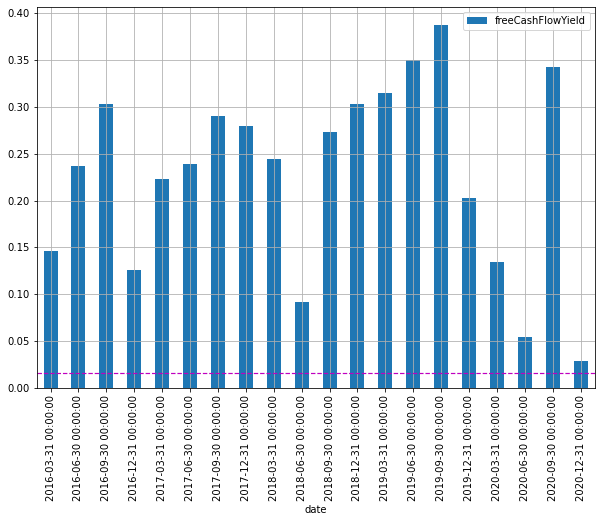

In [35]:
df_stock_metrics['freeCashFlowYield'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['freeCashFlowYield']['50%'], lw=1.2,ls='--', color='m');

In [36]:
quarterly_stat.loc[['roic', 'roe']]

,count,mean,std,min,25%,50%,75%,max
roic,484.0,0.017164,0.040832,-0.076146,-0.000383,0.015115,0.024156,0.729293
roe,440.0,0.004071,0.159903,-2.614622,-0.010213,0.017436,0.039654,1.290644


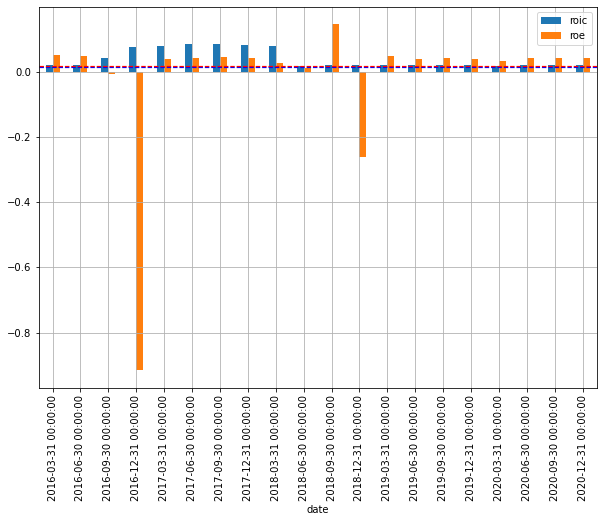

In [37]:
df_stock_metrics[['roic', 'roe']][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['roic']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['roe']['50%'], lw=1.2,ls='--', color='r');

In [38]:
quarterly_stat.loc[['debtToEquity']]

,count,mean,std,min,25%,50%,75%,max
debtToEquity,440.0,0.872567,2.722248,-26.786967,0.067706,0.527194,1.286939,9.429856


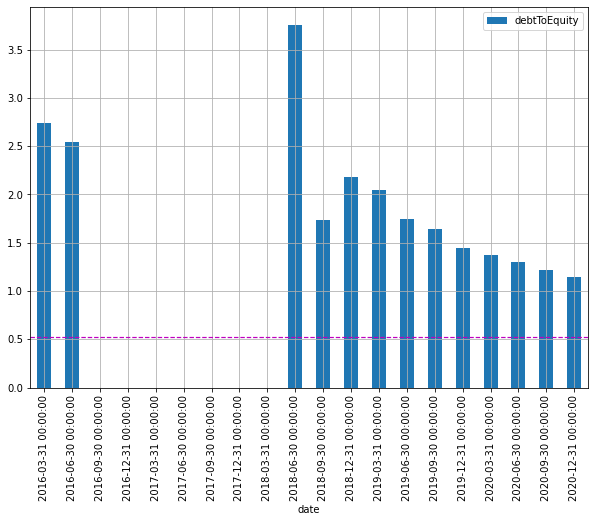

In [39]:
df_stock_metrics['debtToEquity'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['debtToEquity']['50%'], lw=1.2,ls='--', color='m');

### Income Statement

In [40]:
df_income = get_income_statement(ticker_of_interest, 'FY')
df_income.head()

revenue  costOfRevenue  grossProfit  grossProfitRatio  \
symbol date                                                                
DAC    2019-12-31  447.244        199.007      248.237          0.555037   
       2018-12-31  458.732        212.361      246.371          0.537070   
       2017-12-31  451.731        222.227      229.504          0.508055   
       2016-12-31  498.332        238.429      259.903          0.521546   
       2015-12-31  567.936        244.519      323.417          0.569460   

                   researchAndDevelopmentExpenses  \
symbol date                                         
DAC    2019-12-31                             0.0   
       2018-12-31                             0.0   
       2017-12-31                             0.0   
       2016-12-31                             0.0   
       2015-12-31                             0.0   

                   generalAndAdministrativeExpenses  \
symbol date                                           
DAC    2019-12-31                            26.837   
       2018-12-31                            26.334   
       2017-12-31                            22.672   
       2016-12-31                            22.105   
       2015-12-31                            21.831   

                   sellingAndMarketingExpenses  otherExpenses  \
symbol date                                                     
DAC    2019-12-31                          0.0          0.556   
       2018-12-31                          0.0        -50.456   
       2017-12-31                          0.0        -15.757   
       2016-12-31                          0.0        -41.602   
       2015-12-31                          0.0          0.111   

                   operatingExpenses  costAndExpenses  ...  \
symbol date                                            ...   
DAC    2019-12-31             47.163          246.170  ...   
       2018-12-31             47.778          260.139  ...   
       2017-12-31             42.007          264.234  ...   
       2016-12-31             41.558          279.987  ...   
       2015-12-31             37.960          282.479  ...   

                   totalOtherIncomeExpensesNet  incomeBeforeTax  \
symbol date                                                       
DAC    2019-12-31                       -1.464          131.253   
       2018-12-31                     -148.578          -32.936   
       2017-12-31                      -18.486           83.905   
       2016-12-31                     -501.324         -366.195   
       2015-12-31                      -82.767          117.016   

                   incomeBeforeTaxRatio  incomeTaxExpense  netIncome  \
symbol date                                                            
DAC    2019-12-31              0.293471               0.0    131.253   
       2018-12-31             -0.071798               0.0    -32.936   
       2017-12-31              0.185741               0.0     83.905   
       2016-12-31             -0.734841               0.0   -366.195   
       2015-12-31              0.206037               0.0    117.016   

                   netIncomeRatio        eps  epsdiluted  \
symbol date                                                
DAC    2019-12-31        0.293471   8.290000    8.090000   
       2018-12-31       -0.071798  -3.079982   -3.079982   
       2017-12-31        0.185741  10.639936   10.639936   
       2016-12-31       -0.734841 -46.759719  -46.759719   
       2015-12-31        0.206037  14.979910   14.979910   

                   weightedAverageShsOut  weightedAverageShsOutDil  
symbol date                                                         
DAC    2019-12-31             15834913.0                16220697.0  
       2018-12-31             10622902.0                10622902.0  
       2017-12-31              7844641.0                 7844641.0  
       2016-12-31              7843017.0                 7843017.0  
       2015-12-31          

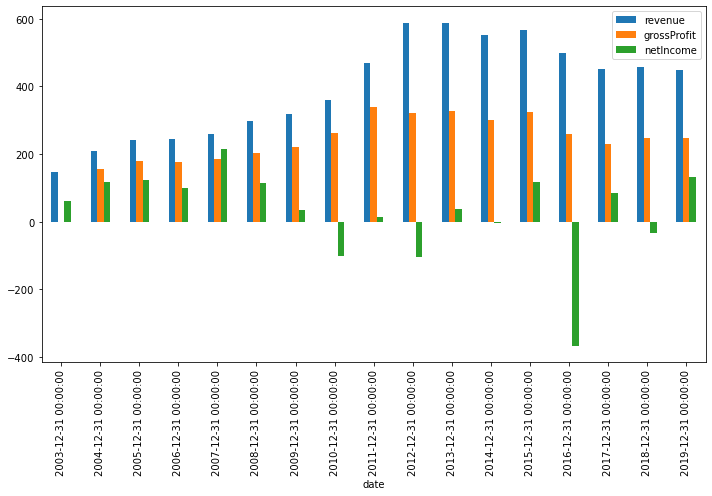

In [41]:
df_income.loc[ticker_of_interest][['revenue', 'grossProfit', 'netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

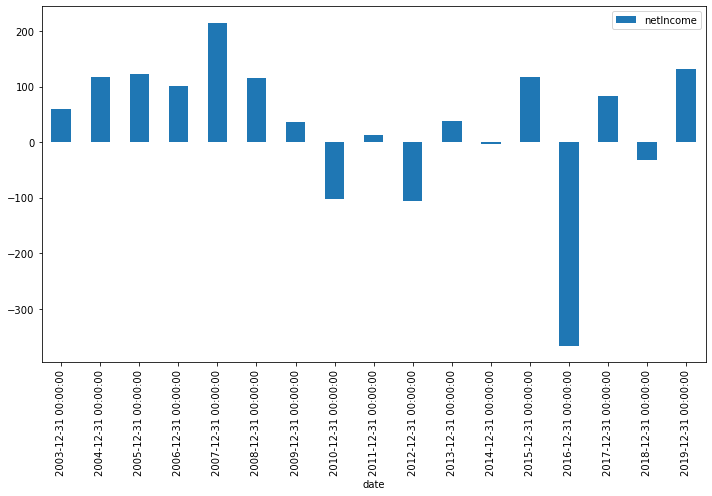

In [42]:
df_income.loc[ticker_of_interest][['netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

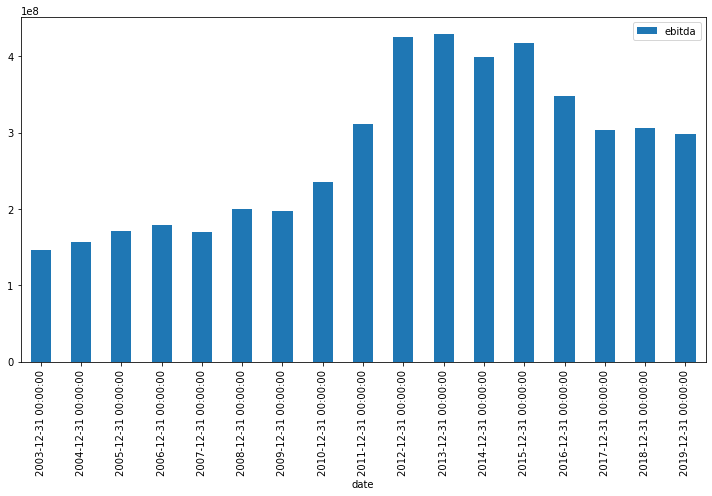

In [43]:
df_income.loc[ticker_of_interest][['ebitda']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

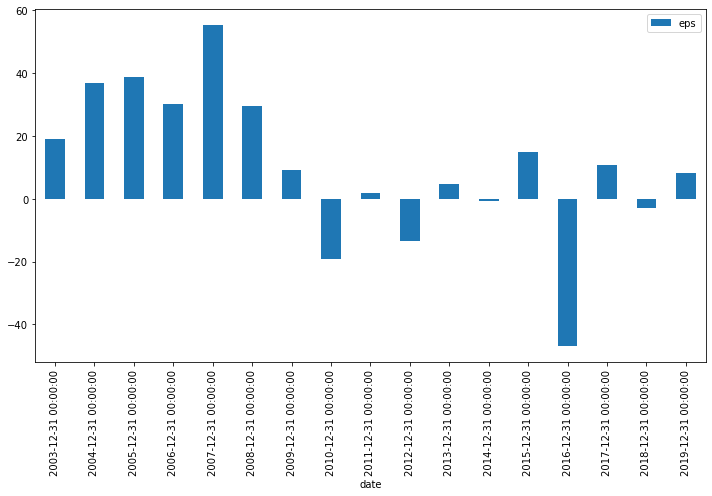

In [44]:
df_income.loc[ticker_of_interest][['eps']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Cashflow Statement

In [45]:
df_cashflow = get_cash_flow_statement(ticker_of_interest, 'FY')
df_cashflow.head()

netIncome  depreciationAndAmortization  deferredIncomeTax  \
symbol date                                                                    
DAC    2020-12-31    153.550                      101.531                0.0   
       2019-12-31    131.253                       96.505                0.0   
       2018-12-31    -32.936                      107.757                0.0   
       2017-12-31     83.905                      115.228                0.0   
       2016-12-31   -366.195                      129.045                0.0   

                   stockBasedCompensation  changeInWorkingCapital  \
symbol date                                                         
DAC    2020-12-31                   1.199                  -2.820   
       2019-12-31                   4.241                 -36.514   
       2018-12-31                   1.006                 -23.643   
       2017-12-31                   0.000                 -36.705   
       2016-12-31                   0.076                 -10.225   

                   accountsReceivables  inventory  accountsPayables  \
symbol date                                                           
DAC    2020-12-31               -0.411     -1.125            -0.181   
       2019-12-31                2.080      0.390             0.114   
       2018-12-31               -2.723     -0.043            -0.894   
       2017-12-31               -2.544      2.554             0.215   
       2016-12-31              -13.210     -0.355            -0.383   

                   otherWorkingCapital  otherNonCashItems  ...  dividendsPaid  \
symbol date                                                ...                  
DAC    2020-12-31               -7.438             14.374  ...            0.0   
       2019-12-31              -14.995             21.817  ...            0.0   
       2018-12-31              -17.529             12.321  ...            0.0   
       2017-12-31              -19.301             10.390  ...            0.0   
       2016-12-31               26.501              9.204  ...            0.0   

                   otherFinancingActivites  \
symbol date                                  
DAC    2020-12-31                  -19.963   
       2019-12-31                   23.093   
       2018-12-31                  -25.174   
       2017-12-31                    0.000   
       2016-12-31                    0.006   

                   netCashUsedProvidedByFinancingActivities  \
symbol date                                                   
DAC    2020-12-31                                  -168.450   
       2019-12-31                                  -136.623   
       2018-12-31                                  -148.868   
       2017-12-31                                  -189.653   
       2016-12-31                                  -251.124   

                   effectOfForexChangesOnCash  netChangeInCash  \
symbol date                                                      
DAC    2020-12-31                         0.0          -73.507   
       2019-12-31                         0.0           61.895   
       2018-12-31                         0.0            7.568   
       2017-12-31                         0.0           -6.822   
       2016-12-31                         0.0            1.464   

                   cashAtEndOfPeriod  cashAtBeginningOfPeriod  \
symbol date                                                     
DAC    2020-12-31             65.663                  139.170   
       2019-12-31            139.170                   77.275   
       2018-12-31             77.275                   69.707   
       2017-12-31             66.895                   73.717   
       2016-12-31             73.717                   72.253   

                   operatingCashFlow  capitalExpenditure  freeCashFlow  
symbol date                                                             
DAC    2020-12-31            265.679            -170.661        95.018  
     

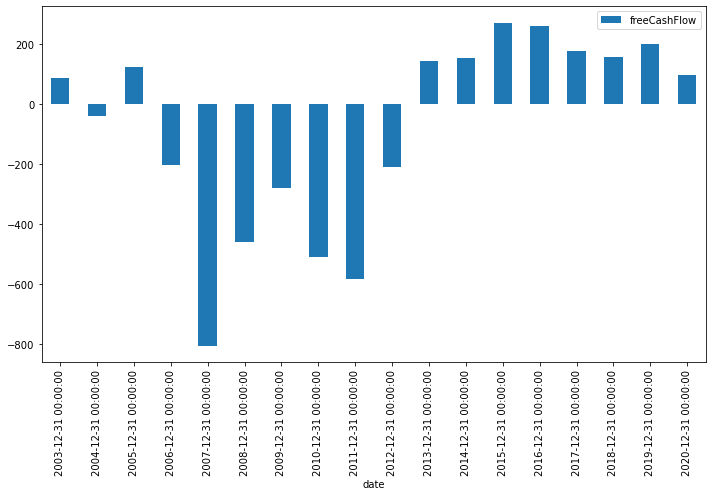

In [46]:
df_cashflow.loc[ticker_of_interest][['freeCashFlow']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Comparison
check for both FY and quarter

In [ ]:
metrics = df_metrics.columns.to_list()

for metric in metrics:
    make_comparison_plot(df_metrics_quarter, ticker_of_interest, 'DLTR', metric);

In [ ]:
earning_calender = get_earnings_calendar()

In [ ]:
earning_calender.loc['RUN']